# Logistic Regression

Hyperparameters for a logistic regression model will by optimised and used to fit a logistic regression model on the training dataset. The model performance will be evaluated on the test set.

## Prep

### Import modules

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
from joblib import dump
from joblib import load
import joblib

### Load training set

Since logistic regression is a statistical model that requires the independent variables to be, well, independent, the feature subset excluding multi-colinear variables will be loaded.

In [6]:
X_train_stat = pd.read_csv ('X_train_stat_4.csv', index_col = 0)
y_train_stat = pd.read_csv ('y_train_4.csv', index_col = 0)

## Optimise logistic regression hyperparameters

33% of the training set will be obtained to optimise the hyperparameters for logistic regression. Subsequently, logistic regression will be fit on the entirety of the training set with the best hyperparameters.

In [7]:
X_train_33, _, y_train_33, _ = train_test_split (X_train_stat, y_train_stat, test_size=0.67, stratify = y_train_stat)

del X_train_stat, X_test_stat, y_train_stat, y_test_stat, df

Define the hyperparameters and their corresponding values to choose from for a grid search.

In [9]:
# Define the parameter grid for grid search
param_grid = [
    { # For L1 penalty of logistic regression
        'preprocessor__scaler': [None, StandardScaler(), MinMaxScaler()],
        'classifier__penalty': ['l1'],
        'classifier__solver': ['saga'],
        'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
        'preprocessor__pca__n_components': [None, 5, 20]
    },
    { # For L2 penalty of logistic regression
        'preprocessor__scaler': [None, StandardScaler(), MinMaxScaler()],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs'],
        'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
        'preprocessor__pca__n_components': [None, 5, 20]
    }
]

Define a pipeline for pre-processing and logistic regression fitting.

In [10]:
# Create the pipeline for logistic regression
logistic_pipeline = Pipeline([
    ('preprocessor', Pipeline ([
        ('scaler', StandardScaler()),
        ('pca', PCA())
    ])),
    ('classifier', LogisticRegression(max_iter = 1000))
])


<a id='params'></a>Perform grid search for the best hyperparameters. The best hyperparameters here refer to the values that give the best accuracy score for the average 5-fold cross-validation accuracy.

In [11]:
# Perform grid search
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5)
grid_search.fit(X_train_33, y_train_33)

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-pac

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-pac

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('pca', PCA())])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid=[{'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
                          'classifier__penalty': ['l1'],
                          'classifier__solver': ['saga'],
                          'preprocessor__pca__n_components': [None, 5, 20],
                          'preprocessor__scaler': [None, StandardScaler(),
                                                   MinMaxScaler()]},
                         {'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['lbfgs'],
                          'preprocessor__pca__n_components': [None, 5, 20],
                          'preprocessor__scaler': [None, StandardScaler(),
                                                   MinMaxScaler()]}])

In [12]:
## Print the best hyperparameters:
# Extract the best model:
best_model = grid_search.best_estimator_
# Extract the best hyperparameters:
best_params = grid_search.best_params_
print("Best Hyperparameters:\n", best_params)
######

Best Hyperparameters:
 {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'preprocessor__pca__n_components': None, 'preprocessor__scaler': MinMaxScaler()}


## Fit logistic regression

Load the entire training and test sets.

In [3]:
# Load training data:
X_train = pd.read_csv ('X_train_stat_4.csv', index_col = 0)
y_train = pd.read_csv ('y_train_4.csv', index_col = 0)
X_test = pd.read_csv ('X_test_stat_4.csv', index_col = 0)
y_test = pd.read_csv ('y_test_4.csv', index_col = 0)

y_train = y_train.prediabetes_bin_y
y_test = y_test.prediabetes_bin_y

Fit logistic regression with the best parameters identified [above](#params).

In [14]:
## Train a logistic regression with the best parameters discovered:
# 1. Scale data using
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform (X_train)
# 2. Instantiate Logistic Regression

logreg = LogisticRegression (penalty = 'l2',
                             C = 0.1,
                             solver = 'lbfgs',
                             max_iter = 15000) # Increase the maximum number of iterations

# 3. Fit Logistic Regression on the scaled train dataset
logreg.fit (X_train, y_train)

C:\Users\Vassil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, max_iter=15000)

Save the model for later use

In [16]:
# save model:
dump(logreg, 'best_logreg_model.joblib')

['best_logreg_model.joblib']

## Assess logistic regression performance

Test the performance of the logistic regression model by obtaining metrics for both test and train subsets.

In [17]:
## Predictions for train
# Predict rating for train:
lg_best_train = logreg.predict (X_train_scaled)
# Training test performance:
report_train = classification_report (y_train, lg_best_train)
print(report_train)
#####

## Confusion matrix:
# Generate the confusion matrix
confusion_mat = confusion_matrix(y_train, lg_best_train)

# Convert the confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(
    confusion_mat, 
    index=['Actual Negative', 'Actual Positive'], 
    columns=['Predicted Negative', 'Predicted Positive'])
print (confusion_df)
#####

## Predictions for test:
# Scale test set:
X_test_scaled = scaler.transform (X_test)
# Predict rating for test:
lg_best_test = logreg.predict (X_test_scaled)

# Obtain calssification reports:
report_test = classification_report (y_test, lg_best_test)

## Confusion matrix:
# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, lg_best_test)

# Convert the confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(
    confusion_mat, 
    index=['Actual Negative', 'Actual Positive'], 
    columns=['Predicted Negative', 'Predicted Positive'])
print (confusion_df)
#####

# Print results:
print ("Full report for train dataset:\n", report_train, "----------\n")
print ("Full report for test dataset:\n", report_test, "----------\n")
#####

C:\Users\Vassil\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.83      0.97      0.89    288507
           1       0.96      0.81      0.88    288507

    accuracy                           0.89    577014
   macro avg       0.90      0.89      0.89    577014
weighted avg       0.90      0.89      0.89    577014

                 Predicted Negative  Predicted Positive
Actual Negative              279036                9471
Actual Positive               56047              232460


C:\Users\Vassil\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


                 Predicted Negative  Predicted Positive
Actual Negative              119653                3993
Actual Positive               24233               99413
Full report for train dataset:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89    288507
           1       0.96      0.81      0.88    288507

    accuracy                           0.89    577014
   macro avg       0.90      0.89      0.89    577014
weighted avg       0.90      0.89      0.89    577014
 ----------

Full report for test dataset:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89    123646
           1       0.96      0.80      0.88    123646

    accuracy                           0.89    247292
   macro avg       0.90      0.89      0.89    247292
weighted avg       0.90      0.89      0.89    247292
 ----------



We can see that the metrics for the training and the test sets are virtually identical indicating that there is no overfitting (as hoped for by employing L2 regularisation).  
The model performs quite well:
- The model is accurate 89% of the time
- 96% of the positive predictions are truly positive (precision)
    - if the algorithm predicts the incidence of prediabetes for a set of patients, 96% of the patients will develop prediabetes or if the model predicts that a patient will develop prediabetes, the patient can be 96% sure that they will develop prediabetes
- 80% of all prediabetes cases will be correctly predicted by the model (recall)  
  

The probability for determining positive vs negative outcomes will also be assessed to find the optimal value:
- re-examine confusion matrices
- plot precision, recall and accuracy as a function of the p-value accepted as positive results

In [25]:
# Predict probabilities for train:
lg_best_train_p = logreg.predict_proba (X_train_scaled)
# Extract 2nd element of each list in the array (corresponds to 1/prediabetes)
lg_best_train_p_prediab = [ sublist[1] for sublist in lg_best_train_p]
# Predict probabilities for test:
lg_best_test_p = logreg.predict_proba (X_test_scaled)
# Extract 2nd element of each list in the array (corresponds to 1/prediabetes)
lg_best_test_p_prediab = [ sublist[1] for sublist in lg_best_test_p]

# Obtain accuracy, precision and recall for each threshold

# Instantiate empty lists:
accuracies_train = []
accuracies_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []

# Obtain metrics for each p-value threshold
for p in np.arange (0.1, 1, 0.05):
    # Class predictions for training dataset
    pred_train_p_prediab = [1 if prob > p else 0 for prob in lg_best_train_p_prediab]
    # Class predictions for test dataset
    pred_test_p_prediab = [1 if prob > p else 0 for prob in lg_best_test_p_prediab]
    # Add accuracy for the specific p-value threshold
    accuracies_train.append (accuracy_score (y_train, pred_train_p_prediab))
    accuracies_test.append (accuracy_score (y_test, pred_test_p_prediab))
    # Add precision for the specific p-value threshold:
    precision_train.append (precision_score (y_train, pred_train_p_prediab))
    precision_test.append (precision_score (y_test, pred_test_p_prediab))
    # Add recall score for the specific p-value threshold:
    recall_train.append (recall_score (y_train, pred_train_p_prediab))
    recall_test.append (recall_score (y_test, pred_test_p_prediab))

C:\Users\Vassil\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vassil\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vassil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vassil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vassil\anaconda3\lib\site-packa

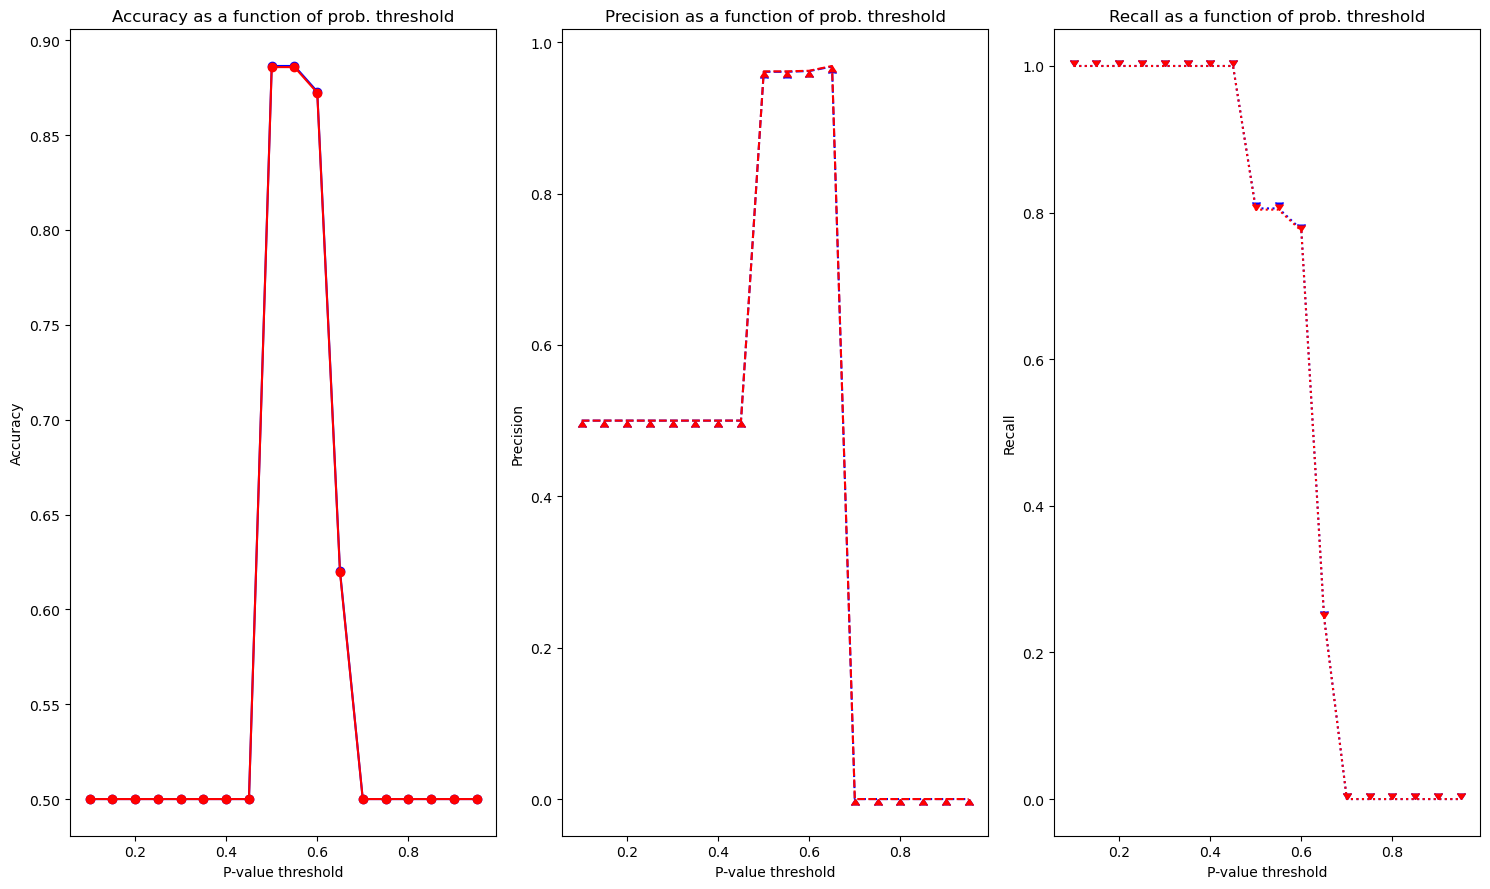

In [77]:
# Plot train and test metrics in 3 separate panels
# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 9))

# Plot accuracy
axes[0].plot(np.arange (0.1, 1, 0.05),
             accuracies_train,
             marker = 'o',
             label = 'train',
             color = 'blue'
            )
axes[0].plot(np.arange (0.1, 1, 0.05),
             accuracies_test,
             marker = 'o',
             label = 'test',
             color = 'red'
            )
axes[0].set_xlabel ('P-value threshold')
axes[0].set_ylabel ('Accuracy')
axes[0].set_title ('Accuracy as a function of prob. threshold')

# Plot precision
axes[1].plot(np.arange (0.1, 1, 0.05),
             precision_train,
             marker = 6,
             linestyle = '--',
             label = 'train',
             color = 'blue'
            )
axes[1].plot(np.arange (0.1, 1, 0.05),
             precision_test,
             marker = 6,
             label = 'test',
             linestyle = '--',
             color = 'red'
            )
axes[1].set_xlabel ('P-value threshold')
axes[1].set_ylabel ('Precision')
axes[1].set_title ('Precision as a function of prob. threshold')

# Plot recall
axes[2].plot(np.arange (0.1, 1, 0.05),
             recall_train,
             marker = 7,
             linestyle = ':',
             label = 'train',
             color = 'blue'
            )
axes[2].plot(np.arange (0.1, 1, 0.05),
             recall_test,
             marker = 7,
             linestyle = ':',
             label = 'test',
             color = 'red'
            )
axes[2].set_xlabel ('P-value threshold')
axes[2].set_ylabel ('Recall')
axes[2].set_title ('Recall as a function of prob. threshold')

plt.tight_layout()
plt.show()

The best accuracy is at probability threshold of 0.5 or 0.55.  
The best precision is at a probability threshold between 0.5 and 0.65.  
The best recall is at probability threshold of 0.45 where the model captures all of the prediabetic cases. The problem is that at this probability, the precision of the prediction is 50% (random guessing). At 0.5 and 0.55, the recall goes down close to 80%, but this is acceptable given that the other metrics are performing very well. Overall, a probability threshold of 0.5 is one of the 2 best thresholds for the data.  
  
---
As shown above, the accuracy for the performance of the logistic regression model is X with precision and recall, X and X, respectively.  
  
Below is a ROC curve with AUC value.

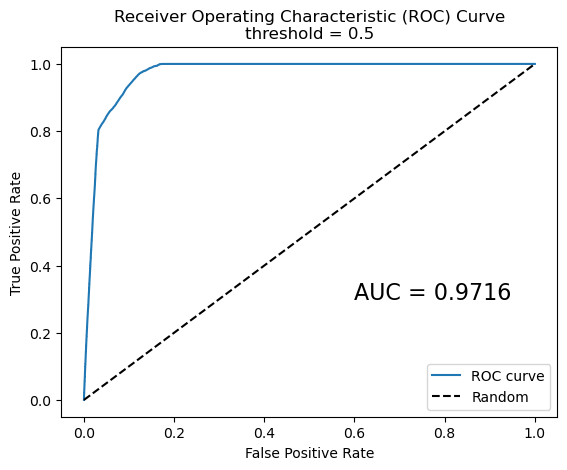

In [26]:
# Obtain metrics for ROC
fpr, tpr, thresholds = roc_curve(y_test, lg_best_test_p_prediab)

# Calculate AUC score
auc_score = roc_auc_score(y_test, lg_best_test_p_prediab)


# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.text(0.6, 0.3, ('AUC = ' + str(round(auc_score, 4))), fontsize = 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nthreshold = 0.5')
plt.legend(loc='lower right')
plt.show()

## Interpretation

One of the benefits of logistic regression models is that they are quite interpretable. Namely, the variable coefficients are proportional to their contribution to explaining the variance of the response variable. More specifically, the greater the coefficient, the more important the corresponding feature is for predicting the outcome. In this context, a major advantage for this would be the possibility for the physician to explain to a patient why he may be prone to develop prediabetes based on the coefficients output by the predictive model. In addition, New insights may be extracted if one performs a deep dive into the variable coefficients and research for potential association with a prediabetic state.  
  
For the sake of simplicity, the top 10 variables with the highest coefficient magnitude will be extracted.

In [19]:
## Obtain a measure of feature importance:

# Write into a dataframe:
coef_df = pd.DataFrame ({'Features' : ['Intercept'] + list (X_test.columns),
                         'Coefficients' : [logreg.intercept_[0]] +\
                                           list(logreg.coef_[0])
                        })
# Sort in descending order:
coef_df.sort_values (by = ['Coefficients'], ascending = False, inplace = True)
# Print table:
print (coef_df)
#####

## Clean up memory:
#del X_test, y_test, X_test_scaled
#####

## Save in a csv file
coef_df.to_csv ('LogReg_coefficients.csv')
#####

                           Features  Coefficients
111                         Calcium      0.562664
114                        Chloride      0.242508
109                     Body Height      0.036477
135                       Potassium      0.035814
110                 Body Mass Index      0.025071
..                              ...           ...
140               Total Cholesterol     -0.025896
143                   Urea Nitrogen     -0.029178
18   Amoxicillin 200 MG Oral Tablet     -0.035143
122                         Glucose     -0.045812
112                  Carbon Dioxide     -0.104481

[144 rows x 2 columns]


Plot top 10 and bottom 10 coefficients for visualization (barplot) and discuss their significance.

In [20]:
# Get the top and bottom 10 categories
top_10 = coef_df.head(10)
bottom_10 = coef_df.tail(10)

# Combine the top and bottom categories
combined = pd.concat([top_10, bottom_10])
display (combined)

Features  Coefficients
111                                            Calcium      0.562664
114                                           Chloride      0.242508
109                                        Body Height      0.036477
135                                          Potassium      0.035814
110                                    Body Mass Index      0.025071
126                Low Density Lipoprotein Cholesterol      0.021314
34                       Penicillin V Potassium 500 MG      0.008924
88                                  Second degree burn      0.004258
134  Polyp size greatest dimension by CAP cancer pr...      0.004026
142                                      Triglycerides      0.003918
129                                   Oral temperature     -0.008109
19                       Cefuroxime 250 MG Oral Tablet     -0.008455
141                                 Total score [MMSE]     -0.009304
119               Estimated Glomerular Filtration Rate     -0.009696
137                                             Sodium     -0.019685
140                                  Total Cholesterol     -0.025896
143                                      Urea Nitrogen     -0.029178
18                      Amoxicillin 200 MG Oral Tablet     -0.035143
122                                            Glucose     -0.045812
112                                     Carbon Dioxide     -0.104481

In [21]:
# Create a color gradient based on values
norm = mcolors.TwoSlopeNorm(vmin = combined.Coefficients.min(),
                         vcenter = 0,
                         vmax = combined.Coefficients.max())
cmap = plt.cm.get_cmap('coolwarm')  # Choose any colormap you like

# Generate color values for each bar based on its value
colors = [cmap(norm(value)) for value in combined.Coefficients.values]

C:\Users\Vassil\AppData\Local\Temp\ipykernel_1960\3176094520.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')  # Choose any colormap you like


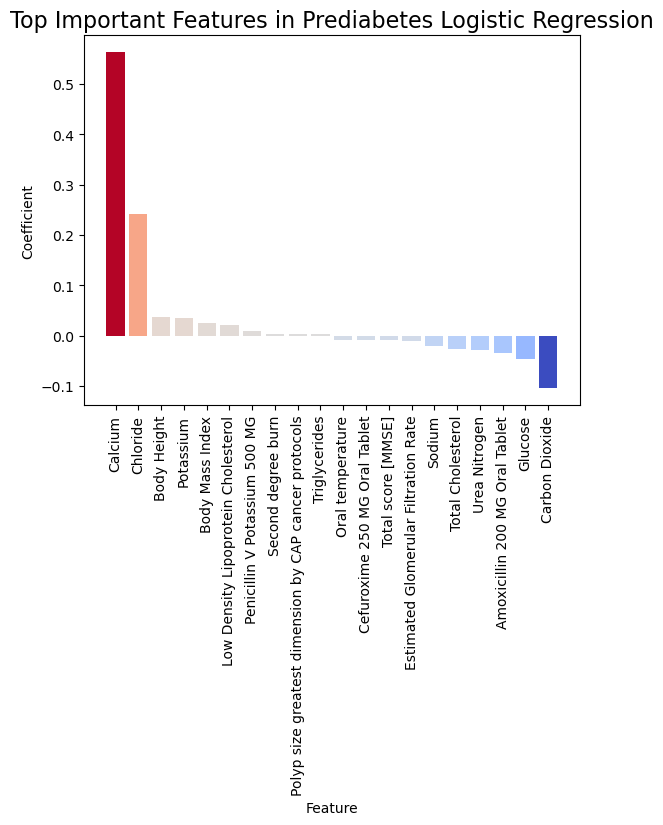

In [22]:
# Create the bar plot
plt.bar(combined['Features'], combined['Coefficients'], color=colors)

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Top Important Features in Prediabetes Logistic Regression',
          fontsize = 16)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

Interesting observations are calcium and chloride measurements are positively predictive for posibility of developing prediabetes. Body mass index is expected to be associated with diabetes. LDL cholesterol (specifically LDL:HDL ratio) and high levels of triglycerides have also been associated with prediabetes. Second degree burn is a bit surprising but one can interpet this as the patient being immobilised for long periods of time and potentially developing some prediabetic tendencies. Calcium levels as predictors for prediabetes are surprising as calcium and vitamin D have been associated with lower incidence of diabetes and prediabetes. Sodium levels are also linked positively to prediabetes whereas our model indicates a negative association. High blood urea nitrogen is also associated with inadequate kidney function, which is linked to diabetes, but the model shows the opposite.  
Interestingly, carbon dioxide levels is a major negative predictor for prediabetes. This is in line with observations demonstrating that too little carbon dioxide in patient blood is linked to complications from diabetes.  
Glucose levels should be the singular best positive predictor of prediabetes. In the synthetic data, however, it appears as a strong negative predictor, which calls into question the quality of the synthetic data.

---